In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab #Imports matplotlib and a host of other useful modules
import pickle
import time

import sys
sys.path.append("./valkyrie")
import motion_planner as mp

In [2]:
import logging
reload(logging)
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')
logging.info('Logging enabled in notebook')


01:44:31 INFO:Logging enabled in notebook


In [3]:
mp = reload(mp)

# Drawings of the robot and playing field

## Airship and other obstacles

Plotted 621/621 


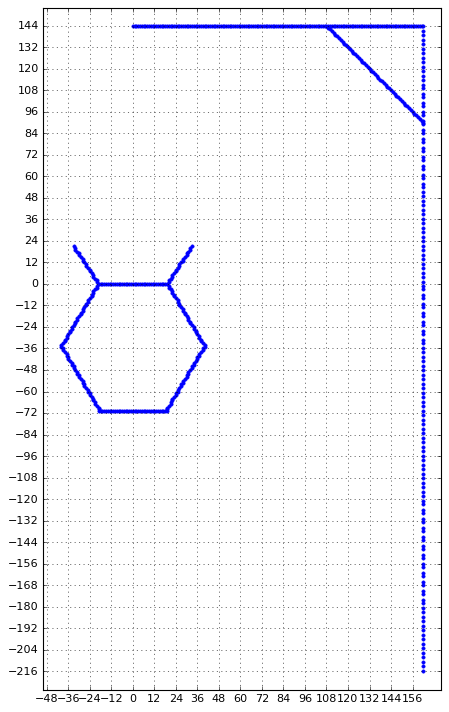

In [4]:
#   Draws the obstacles used in planning.
#   Draws only the half of the field that will actually be explored, 
#   This is flipped over to obtain the other side using reflective symmetry along vertical axis.
mp.plot_xy(mp.xy_obstacles_set(), figsize=11, 
           xlim=(-50,mp.UPPER_XLIMIT+10), 
           ylim=(-1.5*mp.UPPER_YLIMIT-10,mp.UPPER_YLIMIT+10), 
           grid=True)

Plotted 981/981 


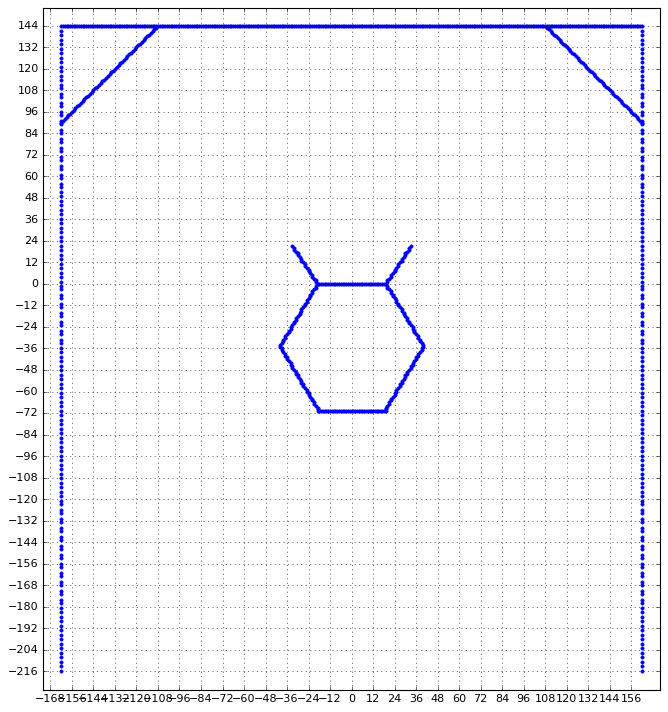

In [5]:
#   Shows what the entire gear-placing portion of the playing field looks like 
#   when reflected vertically to the west half of the playing field.
obstacles = mp.xy_obstacles_set()
for p in set(obstacles):
    obstacles.add((-p[0],p[1])) # reflect vertically
mp.plot_xy(obstacles, figsize=11, 
           xlim=(-mp.UPPER_XLIMIT-10,mp.UPPER_XLIMIT+10), 
           ylim=(-1.5*mp.UPPER_YLIMIT-10,mp.UPPER_YLIMIT+10),
           grid=True)

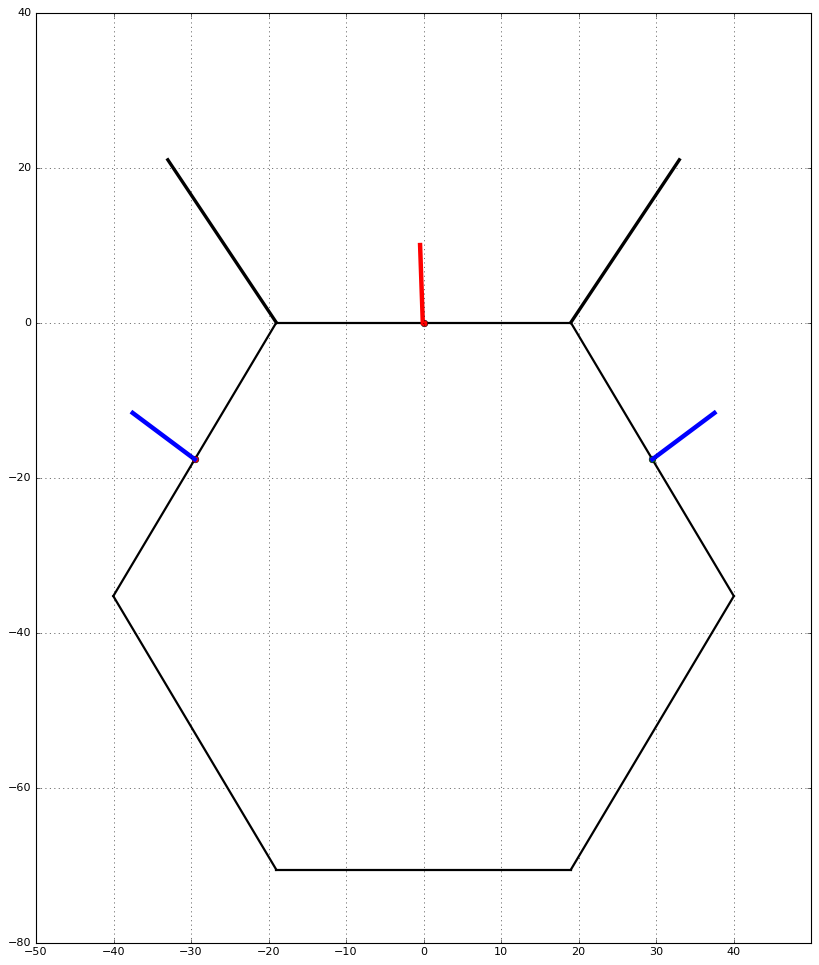

In [6]:
#   Draws overhead view of airship walls that have lifts and pegs. 
mp.plot_airship()
#   The red line is the north goal peg

plot_bot radii     : [35, 40, 5000, 45, 50, 55, 60, 65, 70] (inch)
plot_obt curvatures: 0.029,0.025,0.000,0.022,0.020,0.018,0.017,0.015,0.014 
Determining heading from center of tangent arc assuming direction=lh
Heading: 216.9 degrees (-0.8 pi)
heading: 217


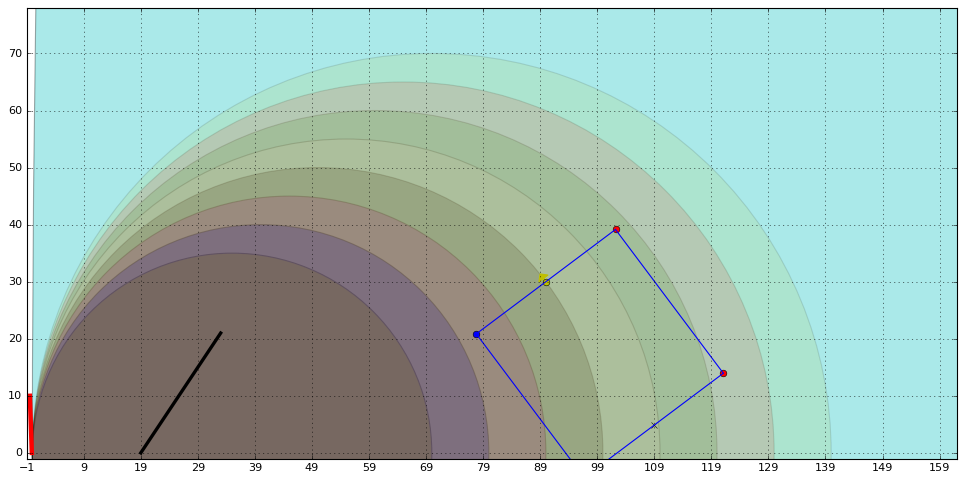

In [5]:
mp.plot_bot((90,30),arc_center = (50,0))


plot_bot radii     : [35, 40, 5000, 45, 50, 55, 60, 65, 70] (inch)
plot_obt curvatures: 0.029,0.025,0.000,0.022,0.020,0.018,0.017,0.015,0.014 
heading: 0


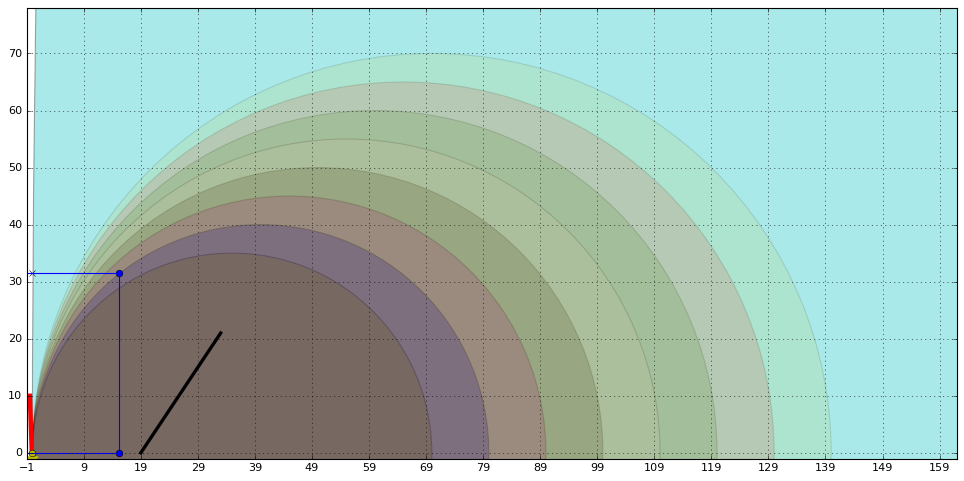

In [481]:
mp.plot_bot((0,0),theta=0)


plot_bot radii     : [35, 40, 5000, 45, 50, 55, 60, 65, 70] (inch)
plot_obt curvatures: 0.029,0.025,0.000,0.022,0.020,0.018,0.017,0.015,0.014 
heading: 270
center:  (59.0, 40.0)
nose from center:  (41.25, 40.0)


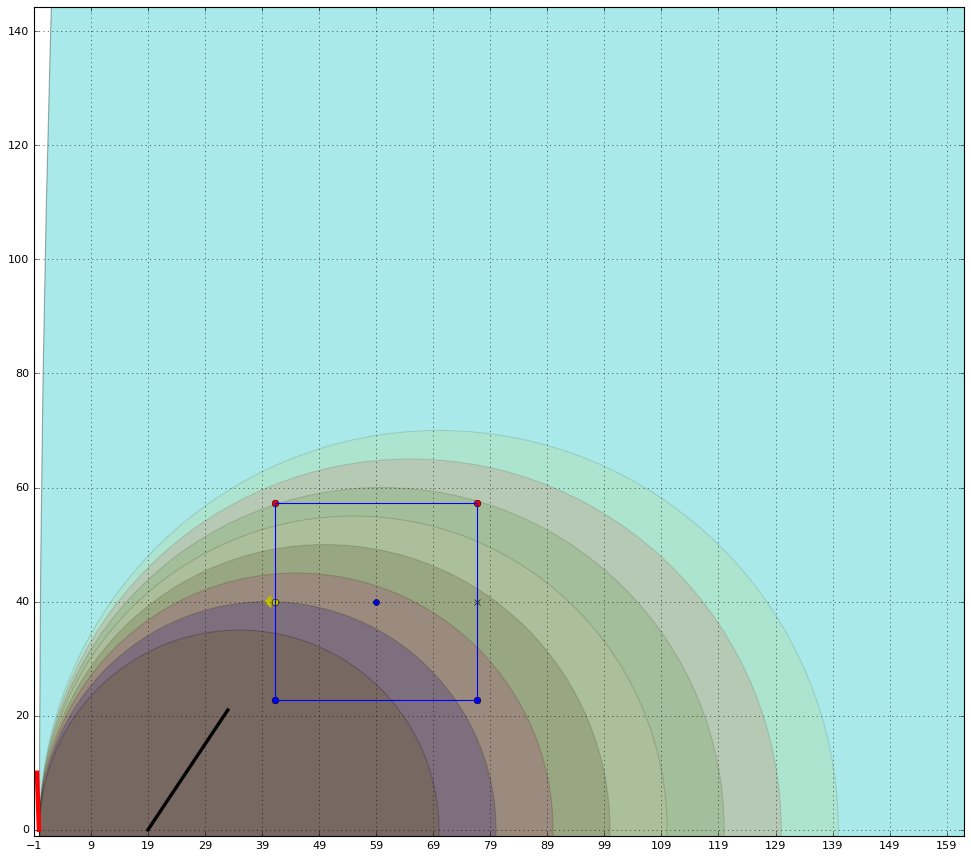

In [7]:
# Places center exactly on gridline intersection.  
# Nose is half a body length ahead of center on the same heading
mp.plot_bot((59-mp.LL/2,40), theta=-np.pi/2) 


#### Lift nearest alliance wall. Up faces alliance wall. Depicts right half of field only.  
Red line (0,0) to (0,9) is peg. 
Blue square is robot. 
Black diagonal is divider.

Configuration space is 6.5' x 13.5'. Vehicle 34.5" x 34.8".
Number of one inch cells: 12,636.  
Using 60 angles per circle gives total number of configurations = 758,160

Downward direction (south) is zero angle. Angles increase counterclockwisely.
Examples: pi/2 faces right, -pi/2 faces left, -pi faces up.

The motion planning algorithm uses degrees instead of radians for easier discretization.

#### Calculations for Robotics
http://rossum.sourceforge.net/papers/CalculationsForRobotics/CirclePath.htm

http://rossum.sourceforge.net/papers/CalculationsForRobotics/CubicPath.htm
    

In [ ]:
#
#  Plots a field of red dots!  Yay? 
#
#  For each item in X and Y
#  - Number of rows is 12*H + 1, where H is playing field height.
#  - Number of columns (size of each vector element) is 12*W + 1, where H is playing field height.

import itertools
x = np.linspace(0, UPPER_XLIMIT, UPPER_XLIMIT+1)
y = np.linspace(0, UPPER_YLIMIT, UPPER_YLIMIT+1)

plt.figure(figsize=(9,9))
ax = pylab.axes(aspect=1) 
plt.scatter(*zip(*itertools.product(x, y)), marker='o', s=5, color='red') # shows grid points
ax.set_xlim(-1.5, 15.5)
ax.set_ylim(-1.5, 15.5)

X, Y = np.meshgrid(x, y)



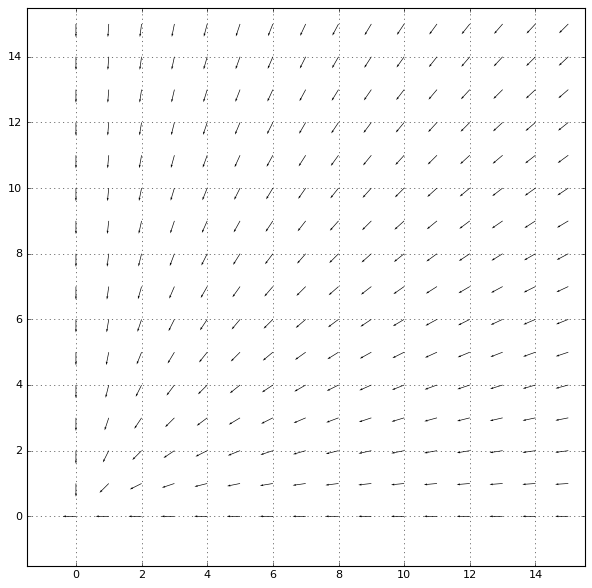

In [27]:
#
# Demonstrates a flow path grid
#
# Assumes X and Y already setup
#
# Flow path based approach was considered but the lookup table size is too big 
# for car-like robot having 360 possible headings.
x = np.linspace(0, mp.UPPER_XLIMIT, mp.UPPER_XLIMIT+1)
y = np.linspace(0, mp.UPPER_YLIMIT, mp.UPPER_YLIMIT+1)
X, Y = np.meshgrid(x, y)

deg = np.zeros_like(X) + -np.pi/2
deg = (np.ones_like(X) * np.arctan2(Y,X)) + np.pi

plt.figure(figsize=(9,9))
ax = pylab.axes(aspect=1)

QP = plt.quiver(X, Y, np.cos(deg), np.sin(deg), units='xy', scale=2.5, minshaft=4, minlength=3)
plt.grid()

ax.set_xlim(-1.5, 15.5)
ax.set_ylim(-1.5, 15.5)
plt.show()


# Visual sanity checks of arc_grid and center_for_tangent

In [ ]:
plot_center_for_tangent((10,10),2*np.pi/4,r=10,turntype='lh')


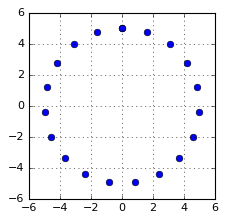

In [3]:
# Fill entire circle
xx=mp.arc_grid(r=5,n=20,c=(0,0),plot=True,figsize=3,debug=False)

In [ ]:
# Go clockwise from 12 to 3
xx=mp.arc_grid(r=5,n=10,c=(0,0),amin=0,amax=np.pi/2,plot=True,figsize=3,debug=True)

In [ ]:
# Go clockwise from 9 to 3
xx=mp.arc_grid(r=5,n=10,c=(0,0),amin=(3.0/2.0)*np.pi,amax=(5.0/2.0)*np.pi,plot=True,figsize=3,debug=True)

In [ ]:
# Clockwise from 9 o'clock to 2
xx=mp.arc_grid(r=5,n=10,c=(0,0),amin=3.0/2.0*np.pi,amax=(9.0/4)*np.pi,plot=True,figsize=3,debug=True)

In [ ]:
# Go counter-clockwise from 12 to 9
xx=mp.arc_grid(r=5,n=10,c=(0,0),amin=0,amax=np.pi/2,plot=True,figsize=3,debug=True,counter=True)

In [ ]:
# Counter-Clockwise from 3 o'clock to 10
xx=mp.arc_grid(r=5,n=10,c=(0,0),amin=3.0/2.0*np.pi,amax=(9.0/4)*np.pi,plot=True,figsize=3,debug=True,counter=True)

In [ ]:
# 
points = arc_grid(r=20, gridsize=100, center, amin, amax, counter=counter)

radius:45, heading : 3.5 radians, 201 degrees,  dist: 120.0
Location p((85, 16)) with heading 201 deg (3.5 rad) on radius 45 
Center of turning radius = (43.0, -0.1)
Plotted: 1000 


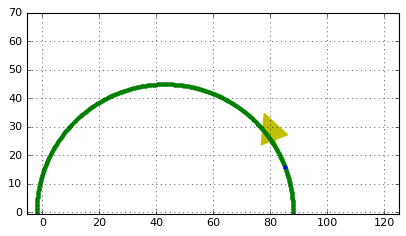

In [109]:
mp = reload(mp)
#   Plots a single path from the filtered states
sss = [(k,v) for k,v in c_filtered.iteritems()][9]
mp.flow_plot_state(sss,xlim=(-5.5,125),ylim=(-0.5,70))


# Fleur-de-lis space filling curve


11:06:04 INFO:lh center: (40.0, 30.0)
11:06:04 INFO:rh center: (20.0, 30.0)


aminL: 4.7  amaxL: 7.9
aminR: 4.7  amaxR: 7.9


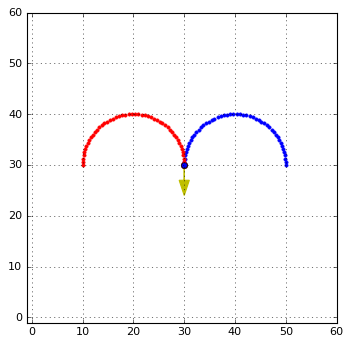

In [708]:
#mp.plot_fleur_de_lis((30, 30, 1020), 10, xlim=(-1,60),ylim=(-1,60))
mp.plot_fleur_de_lis((30, 30, 360), 10, xlim=(-1,60),ylim=(-1,60))

06:33:42 INFO:lh center: (23.6, 21.7)
06:33:42 INFO:rh center: (6.4, 46.3)


aminL: 5.7  amaxL: 8.8
aminR: 3.8  amaxR: 6.9


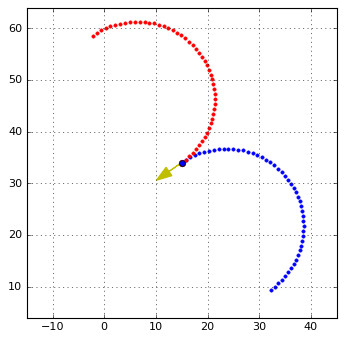

In [883]:
##
##    From actual runs
##
# pp = (100, 39, 145)
# pp = (9, 8, 13)
pp = (119, 82, 500)
pp = (15, 34, 305)
mp.plot_fleur_de_lis(pp, 15, figsize=5, xlim=(pp[0]-30,pp[0]+30), ylim=(pp[1]-30, pp[1]+30), gridsize=50)

07:55:08 INFO:lh center: (20.5, 18.5)
07:55:08 INFO:rh center: (-18.5, 27.5)


aminL: 4.9  amaxL: 8.1
aminR: 4.5  amaxR: 7.6


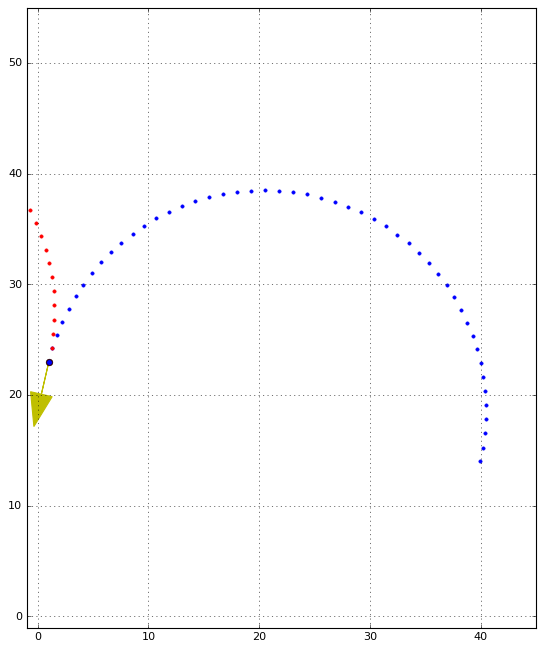

In [31]:
mp.plot_fleur_de_lis((1, 23, 347), 20, figsize=10, xlim=(-1, 45), ylim=(-1, 55), gridsize=50)

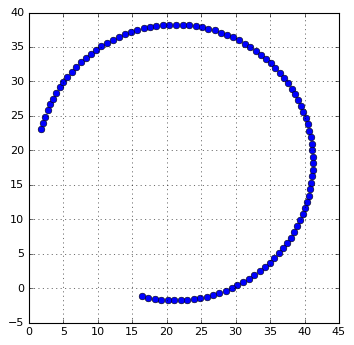

In [4]:
xy = mp.arc_grid(r=20,
 n=100,
 c=(21.222356768509361, 18.242919009741701),
 amin=4.9567350756638957,
 amax=9.6691240560485845,
 counter=False, plot=True)

Plotted 10/10 


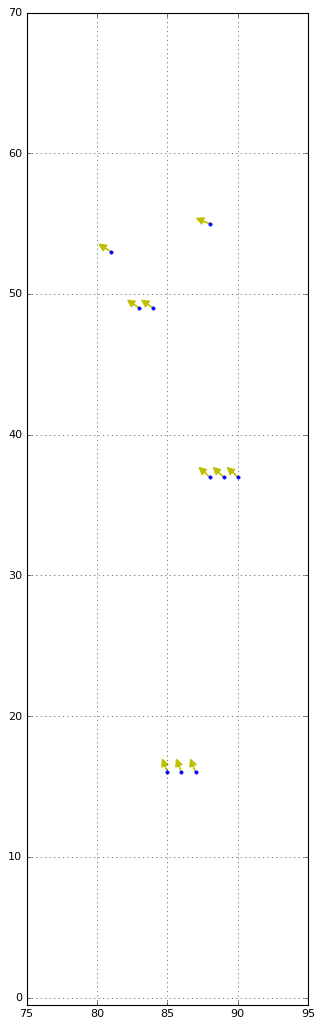

In [110]:
mp.flow_plot_config(config,xlim=(75,95),ylim=(-0.5,70),arrowsize=0.5, arrowlength=0.5, max=10, figsize=16)

Plotted 100/100 


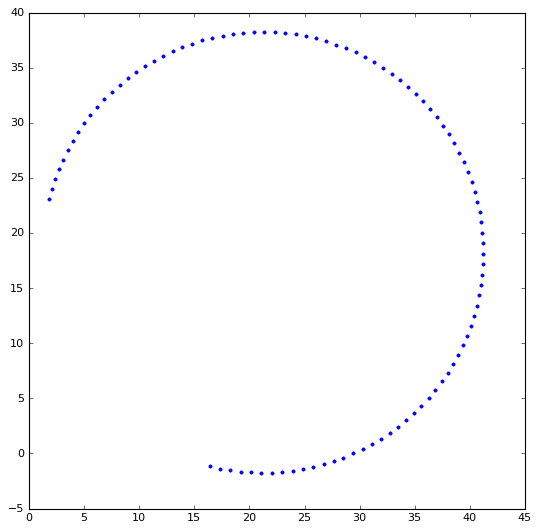

In [665]:
mp.plot_xy(xy)

#  Path testing

In [ ]:
# Used to measure total possible config space size.
x = np.linspace(0, UPPER_XLIMIT, UPPER_XLIMIT+1)
y = np.linspace(0, UPPER_YLIMIT, UPPER_YLIMIT+1)
X, Y = np.meshgrid(x, y)


In [ ]:
# Display small sample of cells having specified turning radius
r = 300
cc = [(k,v["r"],v["dist"]) for k,v in config.items() if v["r"] == r]
print "Number of cells having r=%d: %d" % (r, len(cc))
ss = cc[20]
flow_plot_state(ss,xlim=(-10,20),ylim=(-10.5,40),stage2=False,turntype='lh')

In [ ]:
# Display a single stage1 path
d = 150
cc = [(k,v["r"],v["dist"]) for k,v in config.iteritems() if v["dist"] > d]
print "Number of cells having r=%d: %d" % (r, len(cc))
ss = cc[20]
flow_plot_state(ss,xlim=(-4,200),ylim=(-1.5,88),stage2=False,turntype='lh',figsize=9)



#     Visual pathing sanity checks




In [35]:
# Load stage2 configuration file -- BIG!
config2 = pickle.load(open(mp.STAGE2_CONFIG_PICKLE_FILEPATH, 'rb'))
len(config2)

1543596

In [39]:
##=== Creates goal1s ===

# Selects a small set of 2nd stage states falling within a distance range, and their goal stage
d_min = 100
d_max = 100.001
c_filtered = {}
for k,v in config2.iteritems():
    if "goal2" in v and d_min <= v["dist"] <= d_max:
        c_filtered[k] = v
print "Number of cells having %d <= dist <= %d : %d " % (d_min,d_max,len(c_filtered))
ii=0
if len(c_filtered) < 50: # don't print out if huge
    for k,v in c_filtered.items():
        print k,v
        ii+=1
        if ii>10:
            break
goal1s = list(set([v['goal1'] for v in c_filtered.itervalues() if 'goal1' in v]))
len(goal1s)

Number of cells having 100 <= dist <= 100 : 6 
(78, 33, 240) {'dist': 100.00053206963521, 'goal1': (78, 34, 238), 'r': 15, 'goal2': (0, 0, 350), 'samples': 1, 'dist2': 1.0001852778390656, 'type': 'rh'}
(75, 31, 203) {'dist': 100.0006802278516, 'goal1': (67, 39, 248), 'r': 15, 'goal2': (0, 0, 353), 'samples': 1, 'dist2': 11.600658784674037, 'type': 'lh'}
(66, 51, 225) {'dist': 100.00091003660197, 'goal1': (56, 56, 270), 'r': 15, 'goal2': (-1, 0, 0), 'samples': 1, 'dist2': 11.456797445967474, 'type': 'lh'}
(68, 51, 225) {'dist': 100.00091003660197, 'goal1': (58, 56, 270), 'r': 15, 'goal2': (1, 0, 0), 'samples': 1, 'dist2': 11.456797445967474, 'type': 'lh'}
(79, 34, 311) {'dist': 100.00069027406073, 'goal1': (62, 32, 240), 'r': 15, 'goal2': (0, 0, 355), 'samples': 1, 'dist2': 18.2161664277271, 'type': 'rh'}
(78, 35, 264) {'dist': 100.00030285416958, 'goal1': (73, 37, 244), 'r': 15, 'goal2': (0, 0, 350), 'samples': 1, 'dist2': 5.414512705087869, 'type': 'rh'}


6

Goal1:  (78, 34, 238)
Stage2 path to this state: 43
Plotted 43/43 


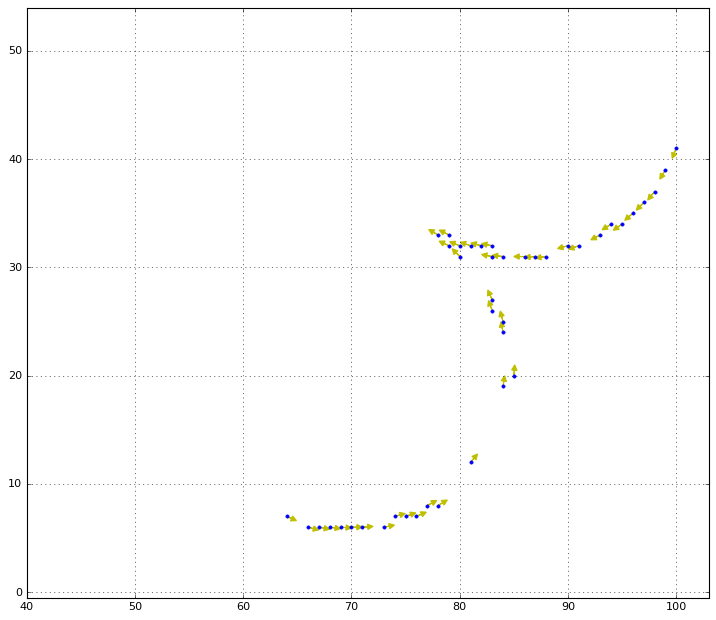

In [49]:
##=== display a goal1 from goal1s ===

##
##  Stage2 fleur-de-lis semicircle paths all feeding into a single Goal1
##
# memo: goal2 is primary goal, goal1 is stage2 goal.
goal1 = goal1s[4]
print "Goal1: ", goal1
fld_f = dict([(k,v) for k,v in config2.iteritems() if "goal1" in v and v['goal1'] == goal1])
print "Stage2 path to this state: %d" % len(fld_f)
mp.flow_plot_config(fld_f, xlim=(40,goal1[0]+25), ylim=(-0.5,goal1[1]+20), arrowsize=0.5, arrowlength=0.5, max=150,figsize=11,verbose=False)

In [36]:
# Load stage1 configuration file
config = pickle.load(open(mp.STAGE1_CONFIG_PICKLE_FILEPATH, 'rb'))
len(config)

130239

In [ ]:
# Selects a small set of states falling within a distance range.
d_min = 120
d_max = 120.01
c_filtered = {}
for k,v in config2.iteritems():
    if "dist2" not in v and d_min <= v["dist"] <= d_max:
        c_filtered[k] = v
print "Number of cells having %d <= dist <= %d : %d " % (d_min,d_max,len(c_filtered))
if len(c_filtered) < 11: # don't print out if huge
    for k,v in c_filtered.items():
        print k,v

In [ ]:
##
##  Stage2 fleur-de-lis semicircle paths all feeding into a single Goal1, PLUS the points on that primary path to goal.
##
# memo: goal2 is primary goal, goal1 is stage2 goal.
goal1 = goal1s[4]
print "Goal1: ", goal1
print "Goal2: ", config2[goal1].get('goal1') # primary goal
print "Dist:  ", config2[goal1].get('dist')
fld_f = dict([(k,v) for k,v in config2.iteritems() if "goal1" in v and v['goal1'] == goal1])
print "Stage2 paths to this state:            %d" % len(fld_f)
prim_f = dict([(k,v) for k,v in config2.iteritems() if 'goal2' not in v 
               and v['goal1'] == config2[goal1]['goal1'] 
               and v['r'] == config2[goal1]['r']
               and v['dist'] <= config2[goal1].get('dist')])
print "Stage1 paths from this Goal1 to Primary Goal: %d" % len(prim_f)
combined = dict(fld_f)
combined.update(prim_f)
mp.flow_plot_config(combined, xlim=(-1,goal1[0]+30), ylim=(-0.5,goal1[1]+30), arrowsize=0.5, arrowlength=0.5, max=150,figsize=11,verbose=True)

In [ ]:
list(mp.bresenham(19,0,33,21))


# Validate collision checker


In [ ]:
#unreachables = mp.load_unreachables()  # Big!

In [ ]:
# This draws the states for which there is at least one heading which results in an unreachable state.
# The upper and right wall are bordered with many unreachable states, as expected. 
# A circular region surrounding the tip of the divider also.

#mp.plot_unreachables_xy(unreachables)


In [ ]:
which=11
ii=0
for x,y,h in unreachables:
    if ii==which:
        print ii,": (%d,%d,%d) "% (x,y,h)
        plot_check_collision((x,y),h,degrees=True)
        break
    ii+=1

#  Plan Validation
** identify locations not having a path for any heading


In [154]:
# del config2 # Free up if not using

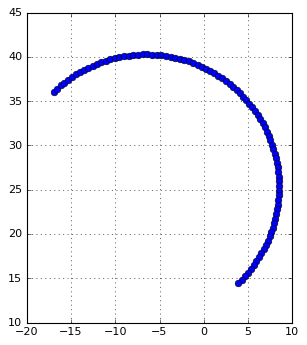

Plotted 90/90 


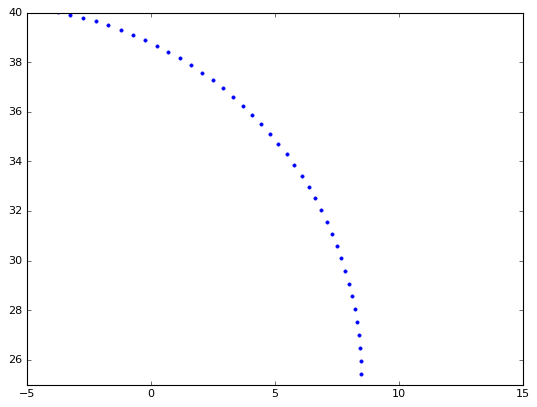

In [914]:
#r, gridsize, center, amin, amax, counter
a=mp.arc_grid(15,90,(-6.5135997379232933, 25.271023008010925),5.5152404363020811,8.6568330898918759,counter=False,plot=True)
mp.plot_xy(a,xlim=(-5,15),ylim=(25,40))

# Compare stage 1 path distance with actual circular arc length



In [ ]:
#config = pickle.load(open(mp.STAGE1_CONFIG_PICKLE_FILEPATH, 'rb'))
print mp.config_progress(config)

In [12]:
max=10
ii=0
for k,v in config.iteritems():
    ii+=1
    print k,v
    if ii>max:
        break

(-1, 68, 7) {'dist': 68.107495822448911, 'r': 410.5, 'type': 'rh', 'samples': 598, 'goal1': (0, 0, 355)}
(16, 36, 300) {'dist': 42.348435440598308, 'r': 35.0, 'type': 'lh', 'samples': 5, 'goal1': (-1, 0, 10)}
(137, 1, 191) {'dist': 189.4272335681398, 'r': 69.5, 'type': 'lh', 'samples': 12, 'goal1': (0, 0, 350)}
(122, 8, 193) {'dist': 172.51927373742939, 'r': 61.5, 'type': 'lh', 'samples': 8, 'goal1': (0, 0, 355)}
(68, 38, 248) {'dist': 90.005915524230673, 'r': 51.0, 'type': 'lh', 'samples': 4, 'goal1': (-1, 0, 350)}
(108, 6, 179) {'dist': 156.23245657152222, 'r': 54.0, 'type': 'lh', 'samples': 6, 'goal1': (0, 0, 7)}
(113, 58, 230) {'dist': 160.24923098134792, 'r': 68.5, 'type': 'lh', 'samples': 9, 'goal1': (0, 0, 5)}
(122, 47, 213) {'dist': 179.71640978059384, 'r': 66.5, 'type': 'lh', 'samples': 5, 'goal1': (1, 0, 10)}
(63, 4, 187) {'dist': 88.4714749401045, 'r': 31.5, 'type': 'lh', 'samples': 12, 'goal1': (0, 0, 0)}
(77, 32, 228) {'dist': 103.4208159186976, 'r': 46.5, 'type': 'lh', 's

In [13]:
config = mp.load_config(mp.STAGE1_CONFIG_PICKLE_FILEPATH)

Loading config file from stage1.pickle


In [14]:
len(config)

130239

In [17]:
def eval_stage1(config, keys=None, max=20, step=0):
    tol=1.0
    if not keys:
        keys = config.keys()
    for k in keys[step*max:(step+1)*max]:
        v = config[k]
        if 'dist2' in v:
            print "%15s :  ERROR. Found dist2 field in stage1 plan" % k
        distuple = mp.arc_dist((k[0],k[1]),(0,0),v['r'],h=np.radians(k[2]),turntype=v['type'])
        sumdist = sum(distuple) if distuple != (None,None) else -1
        error = -1.0 if sumdist<0 else abs(v['dist']-sumdist)
        distr = (-1,-1) if distuple == (None,None) else distuple
        diff = " diff: %3.1f" % error if error > tol else ''
        print "%15s : r:%.1f  dist: %6.1f  actual: %6.1f  tup: (%5.1f, %5.1f)  goal1: %8s   %s" % \
                (k, v['r'], v['dist'], sumdist, distr[0], distr[1], v['goal1'], diff)


def eval2_stage1(config, mintol=0.5,maxtol=10,error_tol=100):
    """
    Evaluates stage1 paths using the cw_arclength measure that is used by the stage 1 planner
    to fill the 'dist' field in the table.

    Validates whether 
    - paths a distance calculation for (x,y,h) that agrees with the distance stored in the table
    - are within tolerance
    """
    start_time = time.time()
    maxprint = 5
    tol=1.0
    useable=0
    discrepant=0
    divergent=0
    missing=0
    logged=0
    for k in config.iterkeys():
        v = config[k]
        if 'dist2' in v:
            print "%15s :  ERROR. Found dist2 field in stage1 plan" % k
        error = -1
        if 'dist' in v and 'goal1' in v:
            (gx,gy,gh) = v['goal1']
            cw_arcl = mp.cw_arclength((gx,gy), (k[0], k[1],), v['r'], tol=0.75)
            error = (abs(cw_arcl-v['dist'])) if cw_arcl else -1
            if logged < maxprint:
                print "error: %.1f" % error
                logged += 1
        if error < 0:
            missing += 1
        if 0 <= error < mintol:
            useable += 1
        if error > maxtol:
            discrepant += 1
        if error > error_tol:
            distuple = arc_dist((k[0],k[1]),(0,0),v['r'],h=np.radians(k[2]),turntype=v['type'],tol=100)
            sumdist = sum(distuple) if distuple != (None,None) else -1
            divergent += 1
            diff = " diff: %3.1f" % error if error > tol else ''
            distr = (-1,-1) if distuple == (None,None) else distuple
            print "%15s : r:%.1f  dist: %6.1f  actual: %6.1f  tup: (%5.1f, %5.1f)  goal1: %8s   %s" % \
                    (k, v['r'], v['dist'], sumdist, distr[0], distr[1], v['goal1'], diff)

    print "Number of states :       %6d" % len(config)
    print "       missing   :       %6d" % missing
    print "       divergent :       %6d" % divergent
    print "       discrepant:       %6d" % discrepant
    print "            exact:       %6d" % useable
    print "Elapsed:  %d seconds " % (time.time()-start_time)

    

In [18]:
eval2_stage1(config,mintol=0.5)

error: 0.0
error: 0.0
error: 5.3
error: 7.2
error: 0.0
Number of states :       130239
       missing   :          175
       divergent :            0
       discrepant:         5664
            exact:        81412
Elapsed:  1 seconds 


In [45]:
def eval3_stage1(config, mintol=2.0,maxtol=10,error_tol=100,al_tol=50):
    """
    Evaluates stage1 paths using a stricter criterion than eval2_stage1,
    comparing the stored 'dist' value with an arc length calculated using the arc_dist method.
    The arc_dist method is not necessarily more correct; on the one hand it is more accurate 
    in certain cases, but on the other hand can be fooled into measuring the wrong arc path 
    resulting in large disrepancies for certain types of states.
    """
    start_time = time.time()
    maxprint = 5
    tol=1.0
    useable=0
    discrepant=0
    divergent=0
    missing=0
    logged=0
    for k in config.iterkeys():
        v = config[k]
        if 'dist2' in v:
            print "%15s :  ERROR. Found dist2 field in stage1 plan" % k
        distuple = mp.arc_dist((k[0],k[1]),(0,0),v['r'],h=np.radians(k[2]),turntype=v['type'],tol=al_tol)
        sumdist = sum(distuple) if distuple != (None,None) else -1
        error = -1.0 if sumdist<0 else abs(v['dist']-sumdist)
        error = (abs(sumdist-v['dist'])) if sumdist>=0 else -1
        if logged < maxprint:
            print "error: %.1f" % error
            logged += 1
        if error < 0:
            missing += 1
        if 0 <= error < mintol:
            useable += 1
        if error > maxtol:
            discrepant += 1
        if error > error_tol:
            divergent += 1
            diff = "diff: %3.1f" % error if error > tol else ''
            distr = (-1,-1) if distuple == (None,None) else distuple
            print "%15s : r:%6.1f  dist:%6.1f arc_dist: %7.1f  tup: (%7.1f, %5.1f)  goal1: %12s   %s" % \
                    (k, v['r'], v['dist'], sumdist, distr[0], distr[1], v['goal1'], diff)


    print "Number of states :       %6d" % len(config)
    print "       missing   :       %6d" % missing
    print "       divergent :       %6d\t(error>%.1f)" % (divergent, error_tol)
    print "          useable:       %6d\t(error<%.1f)" % (discrepant, maxtol)
    print "         accurate:       %6d\t(error<%.1f)" % (useable, mintol)
    print "Elapsed:  %d seconds " % (time.time()-start_time)



In [46]:
eval3_stage1(config,mintol=3,maxtol=10,error_tol=35)

error: 1.6
error: 0.8
error: 3.7
error: 1.8
error: 1.1
   (0, -1, 359) : r:  38.0  dist:   1.0 arc_dist:   237.8  tup: (  237.8,   0.0)  goal1:  (0, 0, 357)   diff: 236.8
  (-1, -1, 352) : r:  37.5  dist:   1.0 arc_dist:   233.6  tup: (  234.5,  -0.8)  goal1: (-1, 0, 350)   diff: 232.6
    (-1, -1, 0) : r:  22.5  dist:   1.0 arc_dist:   139.3  tup: (  140.3,  -1.0)  goal1: (-1, 0, 357)   diff: 138.3
 (146, 12, 179) : r:  73.5  dist: 209.9 arc_dist:   245.7  tup: (  245.5,   0.2)  goal1:   (0, 0, 10)   diff: 35.9
  (-1, -1, 353) : r:1995.5  dist:   1.0 arc_dist: 12536.1  tup: (12537.0,  -0.9)  goal1: (-1, 0, 353)   diff: 12535.1
   (0, -1, 355) : r:1995.5  dist:   1.0 arc_dist: 12537.2  tup: (12537.1,   0.1)  goal1:  (0, 0, 355)   diff: 12536.2
  (-1, -1, 350) : r:1995.5  dist:   1.0 arc_dist: 12536.1  tup: (12536.9,  -0.8)  goal1: (-1, 0, 350)   diff: 12535.1
   (0, -1, 350) : r:1995.5  dist:   1.0 arc_dist: 12537.3  tup: (12537.1,   0.2)  goal1:  (0, 0, 350)   diff: 12536.3
  (-1, -1,

In [47]:
kk = sorted([k for k,v in config.iteritems() if v['dist']>71.5 and v['goal1'] == (0.0, 0.0)])
eval_stage1(config, kk, max=10, step=7)


 (112, 55, 229) : r:68.0  dist:  158.0  actual:  158.7  tup: (159.2,  -0.5)  goal1: (0, 0, 3)   
  (105, 6, 187) : r:52.5  dist:  151.7  actual:  158.5  tup: (158.1,   0.4)  goal1: (0, 0, 0)    diff: 6.8
  (19, 41, 307) : r:46.5  dist:   46.7  actual:   47.5  tup: ( 46.8,   0.6)  goal1: (0, 0, 3)   
  (51, 21, 225) : r:30.0  dist:   70.0  actual:   70.3  tup: ( 70.5,  -0.2)  goal1: (0, 0, 0)   
 (128, 36, 201) : r:67.0  dist:  193.8  actual:  197.6  tup: (198.1,  -0.5)  goal1: (0, 0, 10)    diff: 3.8
  (81, 45, 236) : r:52.0  dist:  112.5  actual:  114.4  tup: (114.4,  -0.0)  goal1: (1, 0, 3)    diff: 1.9
   (60, 0, 187) : r:30.0  dist:   83.3  actual:   87.4  tup: ( 87.0,   0.4)  goal1: (0, 0, 353)    diff: 4.1
  (51, 61, 270) : r:52.0  dist:   90.5  actual:   90.6  tup: ( 90.8,  -0.2)  goal1: (0, 0, 10)   
  (65, 24, 222) : r:37.0  dist:   87.1  actual:   88.9  tup: ( 88.4,   0.5)  goal1: (1, 0, 0)    diff: 1.7
   (68, 8, 184) : r:34.0  dist:   98.4  actual:  110.5  tup: (110.0,   0.

# Visualize stage 1 paths

In [49]:
config = mp.load_config('/Users/mark/Valkyrie/stage1.pickle')

In [50]:
len(config)

130239

3239
Plotted 401/3239 


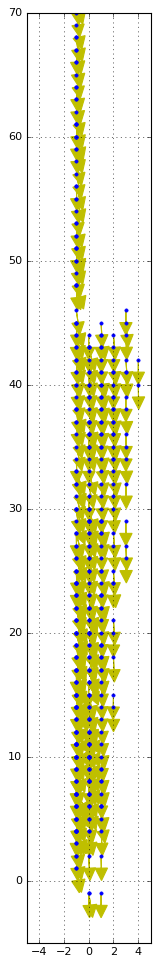

In [51]:
dmin=0
dmax=100
rh = dict([(k,v) for k, v in config.iteritems() if v['type'] == 'rh' and dmin<v['dist']<dmax])
print len(rh)
#mp.flow_plot_config(rh,xlim=(-1.5,20),ylim=(-0.5,70),arrowsize=1, arrowlength=1, max=10)
mp.flow_plot_config(rh,xlim=(-5,5),ylim=(-5,70),arrowsize=1, arrowlength=1, max=400, figsize=15)

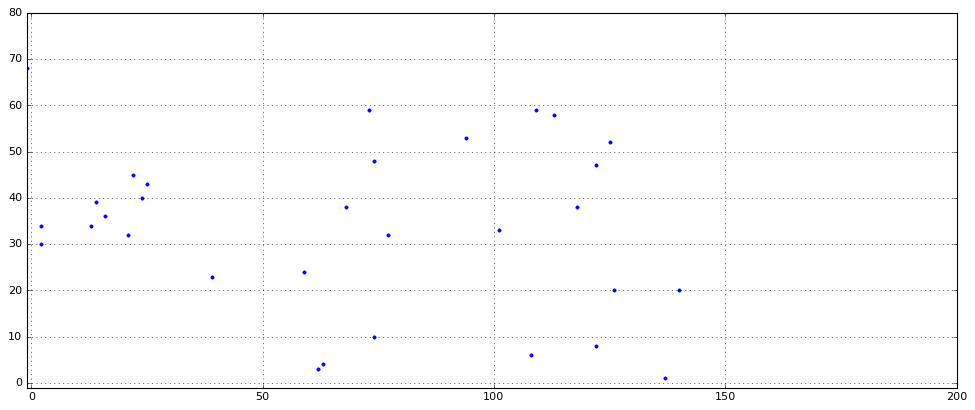

In [56]:
mp.state_scatterplot(config1,minx=-1,maxx=200,miny=-1,maxy=80,max=30,verbose=False)

Plotted 501/115565 


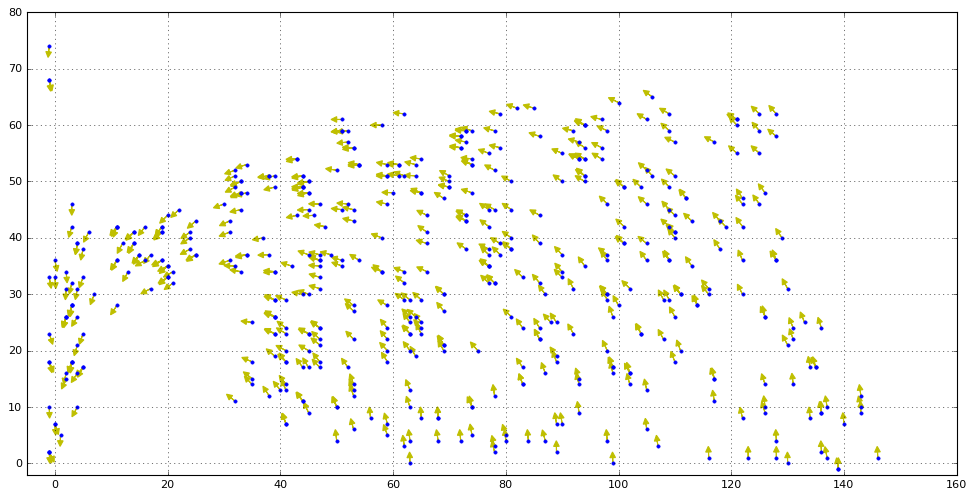

In [733]:
mp.flow_plot_config(config1,xlim=(-5,160),ylim=(-2,80),arrowsize=1, arrowlength=1, max=500,figsize=15)

In [52]:
#   Load stage 2 
#
start = time.time()
#config2 = pickle.load(open(mp.STAGE2_CONFIG_PICKLE_FILEPATH, 'rb'))
#print "Num stage2 states: ",len(config2)
config1 = pickle.load(open(mp.STAGE1_CONFIG_PICKLE_FILEPATH, 'rb'))
print "Num stage1 stages: ",len(config)
print "elapsed: %d sec" % (time.time()-start)


Num stage1 stages:  130239
elapsed: 4 sec


In [69]:
#
# Selects subset of stage 1 states
#
d_min = 30
d_max = 30.01
c_1_40 = dict([(k,v) for k,v in config.iteritems() if "goal2" not in v and "dist" in v and d_min <= v["dist"] <= d_max])
print "\nNum of STAGE 1 cells having %.2f <= dist <= %.2f : %d " % (d_min,d_max,len(c_1_40))
if len(c_1_40) < 10: # don't print out if huge
    for k,v in c_1_40.items():
        mp.print_state(k,v)



Num of STAGE 1 cells having 30.00 <= dist <= 30.01 : 29 


In [106]:
# del config2 # Free up space

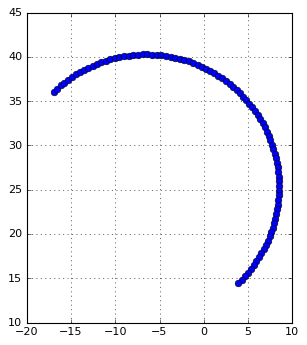

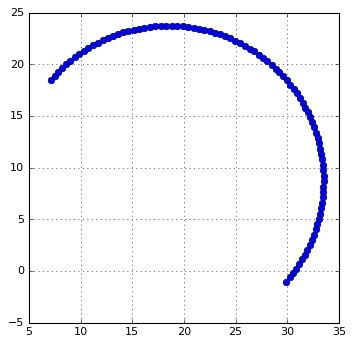

[(7.1245301279000728, 18.49059025097683),
 (7.4761264311535705, 18.886446312757208),
 (7.8414740517174604, 19.269647432612178),
 (8.2201178119510452, 19.639716189664121),
 (8.6115859688792984, 19.996191524324168)]

In [60]:
# goal1: (6, 17)
# goal_heading: 323  (-37 deg,  ~ssw)
# r=15, lh turn
#points = arc_grid(r, gridsize, center, amin, amax, counter=True if turntype == 'rh' else False)

#     points = arc_grid(r, gridsize, center, amin, amax, counter=True if turntype == 'rh' else False)
points = mp.arc_grid(15,90, (-6.5135997379232933, 25.271023008010925), 5.5152404363020811, 8.6568330898918759, counter=False, plot=True)

turntype='lh'
points = mp.arc_grid(15,90, (18.513599737923293, 8.7289769919890752),5.4209926566943869,8.5625853102841809,
                     counter=True if turntype == 'rh' else False,plot=True)


#center = (-6.5135997379232933, 25.271023008010925)
#new center: (looks good)  (18.513599737923293, 8.7289769919890752)
    
# 1. This would actually be the proper rh turn into (6,17,323)
# 2. The points should be explored backwards ccw

points[:5]

In [8]:
# Points proceed clockwise from goal1 backing up along lh turn

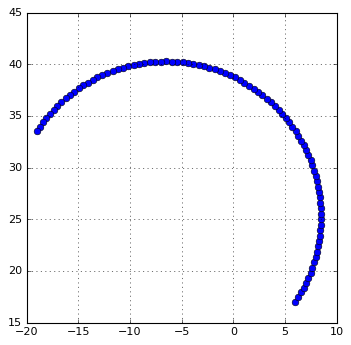

[(6.0091182110278023, 17.013811906735988),
 (6.2927264049784473, 17.460900683640361),
 (6.5603795112494367, 17.917719900413573),
 (6.8117440673995784, 18.383700417196451),
 (7.0465069044928192, 18.85826168029083)]

In [946]:
# RH:
turntype='rh'
points=mp.arc_grid(15,90,(-6.5135997379232933, 25.271023008010925),4.1294490102185835,7.2710416638083766,
            counter=True if turntype == 'rh' else False,plot=True)
points[:5]
# arc looks good, sampling direction (ccw) good

In [942]:
turntype='lh'
center_for_tangent((6, 17), 323, r, turntype='lh' if turntype=='rh' else 'rh')

(31.027199475846587, 0.45795398397815035)

# Visualize Unexplored States

09:37:58 INFO:Loading from unexploreds_xy.pickle


Num unexplored:  279
Plotted 279/279 


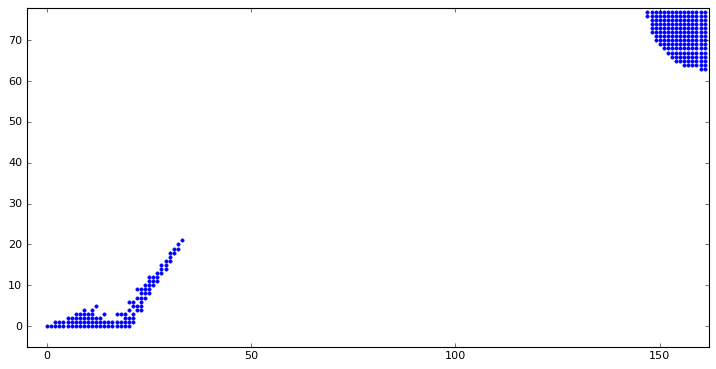

In [3]:
mp = reload(mp)
unexp_xy = mp.load_xy_unexploreds()
print "Num unexplored: ",len(unexp_xy)
mp.plot_xy(unexp_xy, figsize=11, xlim=(-5,mp.UPPER_XLIMIT), ylim=(-5,mp.UPPER_YLIMIT), max=4000)


#  Visualize end result : paths found for fully trained planner

In [4]:
trajs = pickle.load(open('sample_traj.pickle', 'rb'))
print "Number of trajectories loaded: ", len(trajs)

Number of trajectories loaded:  2000


Number trajectories with 1 stage :  115
Num trajectories: 115


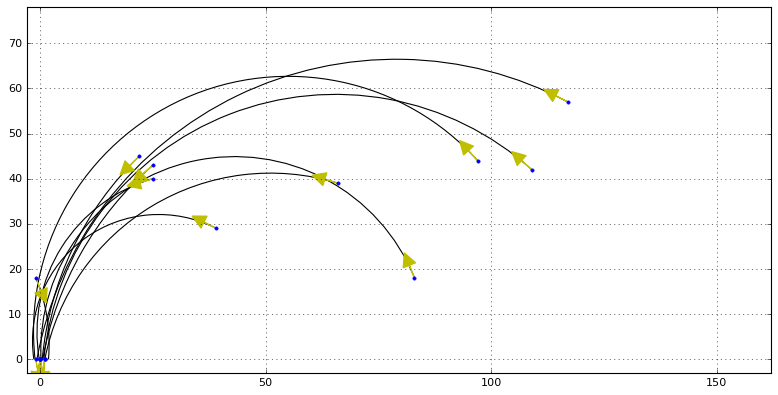

In [5]:
##
## Draws examples of paths having 1 stage
##
trajectories1 = dict([(k,v) for k,v in trajs.iteritems() if len(trajs[k])==1])
print "Number trajectories with 1 stage : ", len(trajectories1)

print "Num trajectories:",len(trajectories1)
mp.path_plot_xyt(trajectories1,xlim=(-3,mp.UPPER_XLIMIT), ylim=(-3,mp.UPPER_YLIMIT), 
                 maxpaths=10, arrowsize=3, arrowlength=3, figsize=12, verbose=False)

Number trajectories having 2 stages :  1232
Num trajectories: 1232


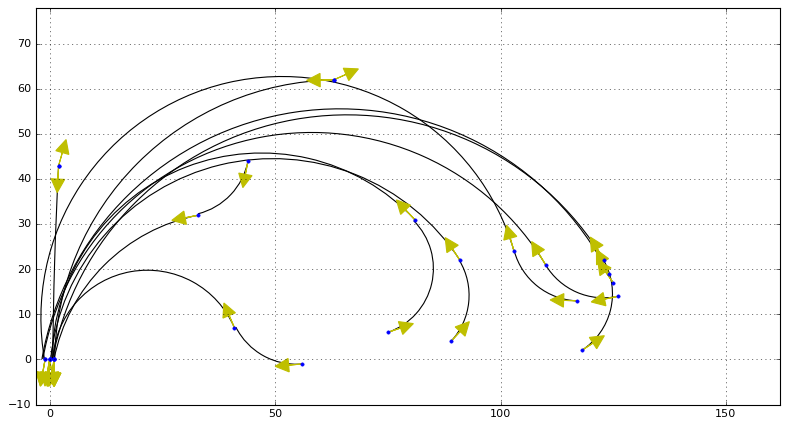

In [6]:
##
## Draws examples of paths having 2 stages
##
trajectories2 = dict([(k,v) for k,v in trajs.iteritems() if len(trajs[k])==2])
print "Number trajectories having 2 stages : ", len(trajectories2)

print "Num trajectories:",len(trajectories2)
mp.path_plot_xyt(trajectories2,xlim=(-3,mp.UPPER_XLIMIT), ylim=(-10,mp.UPPER_YLIMIT), 
                 maxpaths=10, arrowsize=3, arrowlength=3, figsize=12, verbose=False)

Number trajectories having 3 stages :  598
Num trajectories: 598


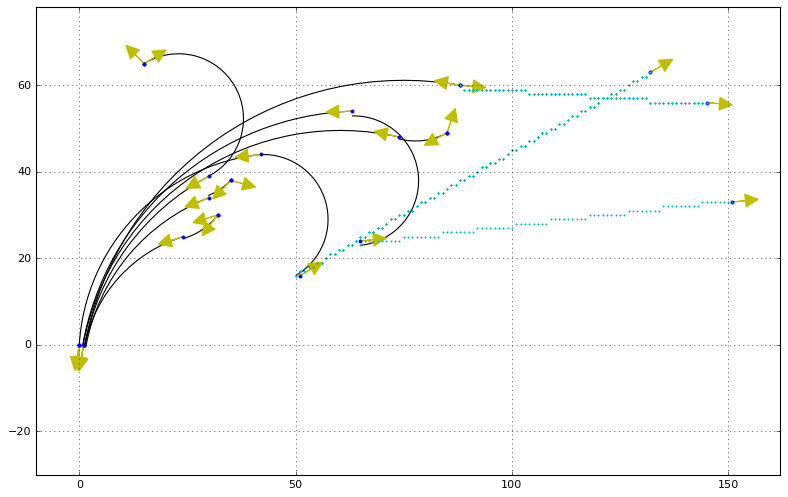

In [7]:
##
## Draws examples of paths having 3 stages
##
trajectories3 = dict([(k,v) for k,v in trajs.iteritems() if len(trajs[k])==3])
print "Number trajectories having 3 stages : ", len(trajectories3)

print "Num trajectories:",len(trajectories3)
mp.path_plot_xyt(trajectories3,xlim=(-10,mp.UPPER_XLIMIT), ylim=(-30,mp.UPPER_YLIMIT), 
                 maxpaths=7, arrowsize=3, arrowlength=3, figsize=12, verbose=False)

Number trajectories having 4 stages :  55
Num trajectories: 55


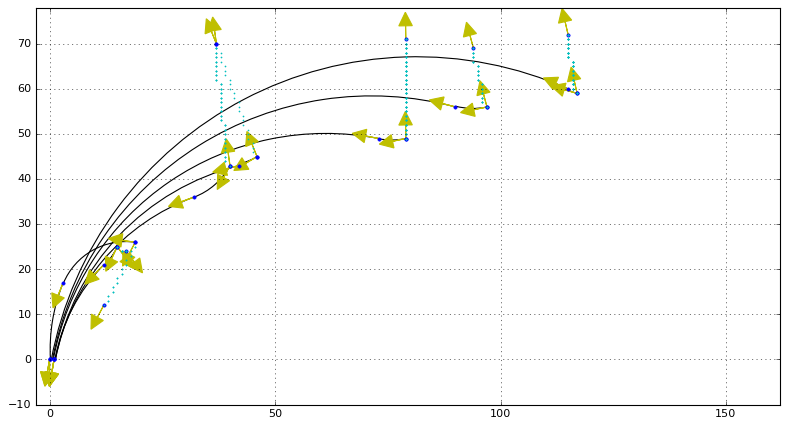

In [8]:
##
## Draws examples of paths having 4 stages
##
trajectories4 = dict([(k,v) for k,v in trajs.iteritems() if len(trajs[k])==4])
print "Number trajectories having 4 stages : ", len(trajectories4)

print "Num trajectories:",len(trajectories4)
mp.path_plot_xyt(trajectories4,xlim=(-3,mp.UPPER_XLIMIT), ylim=(-10,mp.UPPER_YLIMIT), 
                 maxpaths=7, arrowsize=3, arrowlength=3, figsize=12, verbose=False)

Number trajectories under 18 inches long : 31 


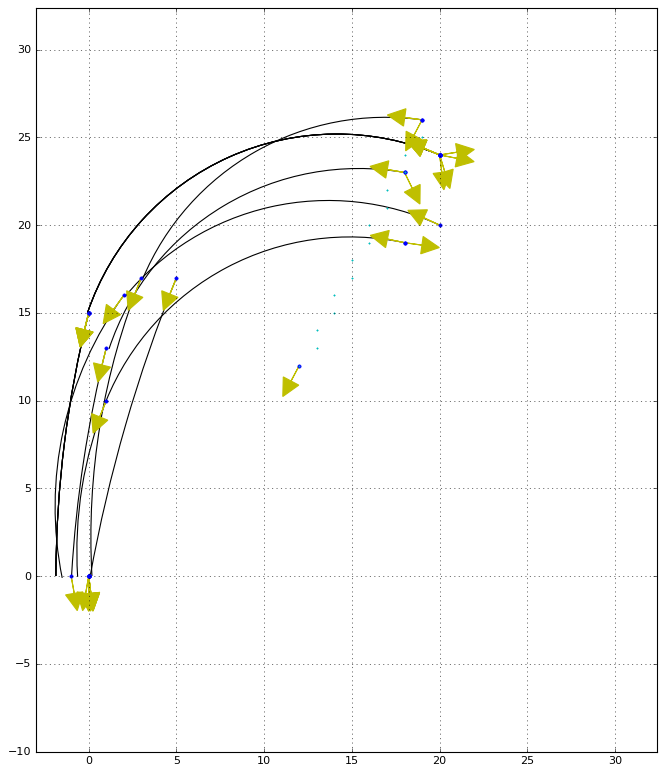

In [14]:
##
## Draws examples of shorter paths
##
maxdist = 18
tshort = {}
for k,v in trajs.iteritems():
    lastpath = v[-1]
    if lastpath[4] < maxdist:
        tshort[k] = v
print "Number trajectories under %d inches long : %d " % (maxdist, len(tshort))

mp.path_plot_xyt(tshort,xlim=(-3,1.8*maxdist), ylim=(-10,1.8*maxdist), 
                 maxpaths=9, arrowsize=1, arrowlength=1, figsize=12, verbose=False)